<a href="https://colab.research.google.com/github/dhwanipatel14/Comp-4340-FinalProject/blob/master/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import os
import sklearn
import cv2
import zipfile

with zipfile.ZipFile("/content/train.zip","r") as z:
    z.extractall(".")
with zipfile.ZipFile("/content/test1.zip","r") as z:
    z.extractall(".")

# Dog vs Cat dataset

In [9]:
train_dataset = "/content/train"
files = os.listdir(train_dataset)

In [10]:
# Training Dataset
x_train = []
y_train = []

# Iterate through files in training dataset
for f in files:
  # Get label/animal from filename - ex. cat.0.jpg, label is before .
  label = f.split(".")[0]
  filepath = train_dataset + "/" + f                  # image filepath
  data = imageio.imread(filepath, as_gray = True)     # read the specified image (in greyscale)
  data_arr = cv2.resize(data, dsize = (80, 80))       # resize the image to 90x90
  # add image data and label to respective arrays
  x_train.append(data_arr)
  y_train.append(label)

print(len(x_train))
print(len(y_train))

25000
25000


In [11]:
X_train = tf.keras.utils.normalize(x_train, axis=1) 

# reshape the data as keras needs 4D and we have 3D datasets
X_train = np.expand_dims(X_train, axis=-1)

print(X_train.shape)

(25000, 80, 80, 1)


In [12]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
Y_train = lb.fit_transform(y_train)
Y_train

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
import tensorflow.keras as keras

# build the model
model = keras.Sequential()

# hidden layers
model.add(keras.layers.Conv2D(128, 3, input_shape=(80, 80, 1), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
tf.keras.layers.Dropout(0.30)

model.add(keras.layers.Conv2D(256, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
tf.keras.layers.Dropout(0.40)

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

#compiling model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#fitting model
modelHistory =  model.fit(X_train, Y_train, epochs= 3, validation_split=0.2, batch_size=32)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 78, 78, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 256)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [16]:
model.save('model.h5')
json_model = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(json_model)

print("Successfully saved!")

Successfully saved!


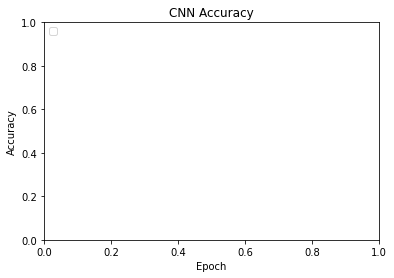

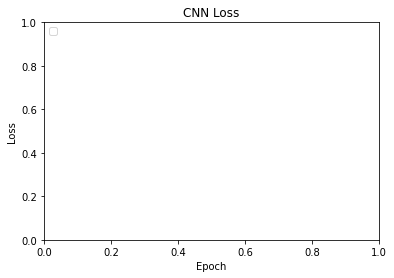

In [17]:
# Display model stats

# Model Accuracy
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Loss
plt.title('CNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [18]:
test_data = []
test_data_image = []
test_dataset = "/content/test1"
files = os.listdir(test_dataset)

for f in files:
  id = f.split(".")[0]
  filepath = test_dataset + "/" + f
  data = imageio.imread(filepath, as_gray = True)     # read the specified image (in greyscale)
  data_arr = cv2.resize(data, dsize = (80, 80))       # resize the image to 90x90
  test_data_image.append(data_arr)

In [19]:
test_data = tf.keras.utils.normalize(test_data_image, axis=1) 

# reshaphing from 3D to 4D
test_data = np.expand_dims(test_data, axis=-1)

print(test_data.shape)
labels = list(lb.classes_)
labels

(12500, 80, 80, 1)


['cat', 'dog']

In [20]:
predictions = model.predict(test_data)

classes = []
for p in predictions:
  classes.append(round(p[0]))

391/391 [==============================] - 215s 549ms/step


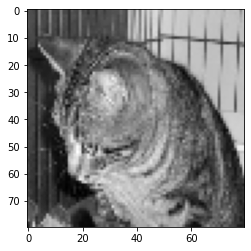

Model prediction - class: 0 which is a cat


In [24]:
import random
import matplotlib.pyplot as plt

size = len(test_data_image)

image = random.randint(0, size)
plt.imshow(test_data_image[image], cmap="gray")
plt.show()

model_prediction = int(classes[image])

print("Model prediction - class:", model_prediction, "which is a", labels[model_prediction])